In [1]:
import numpy as np
import pandas as pd
import os
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Fent el df

In [3]:
#llegeix totes les dades de data i les posa al df
files = [("data/" + f) for f in os.listdir("data/") if f.endswith('.csv')]
df = pd.concat(map(pd.read_csv, files))

In [4]:
tags = ["User", "Email", "Billable", "Task", "Tags", "Amount ()"]
    
df.drop(tags, axis=1, inplace=True)

df

,Client,Project,Description,Start date,Start time,End date,End time,Duration
0,Universitat,Erasmus,Gestió,2022-01-03,09:45:23,2022-01-03,09:47:00,00:01:37
1,Universitat,Xarxes,Capa Enllaç,2022-01-03,10:07:13,2022-01-03,10:33:39,00:26:26
2,Universitat,Xarxes,Capa Enllaç,2022-01-03,10:35:31,2022-01-03,11:23:14,00:47:43
3,Universitat,Topologia,Llista 4,2022-01-03,11:40:00,2022-01-03,12:04:18,00:24:18
4,Universitat,Topologia,Compactes,2022-01-03,12:13:29,2022-01-03,12:26:49,00:13:20
...,...,...,...,...,...,...,...,...
15,Habilitats,Projectes,Productivitat Python,2022-03-19,17:47:36,2022-03-19,19:20:22,01:32:46
16,Vida Adulta,Neteja,Roba,2022-03-20,17:52:00,2022-03-20,18:00:00,00:08:00
17,Vida Adulta,Neteja,Terres,2022-03-20,18:47:13,2022-03-20,19:11:03,00:23:50
18,Vida Adulta,Neteja,Roba,2022-03-20,21:45:00,2022-03-20,22:00:00,00:15:00


In [5]:
toDate = ['Start date', "Start time", "End date", "End time", "Duration"]
toString = ["Client", "Project", "Description"]

for item in ["Start date", "End date"]:
    df[item] = pd.to_datetime(df[item])

for item in toString:
    df[item] = df[item].astype(str)

In [6]:
df.dtypes

Client                 object
Project                object
Description            object
Start date     datetime64[ns]
Start time             object
End date       datetime64[ns]
End time               object
Duration               object
dtype: object

In [7]:
uni_cond = df["Client"] == "Universitat"
adulting_cond = df["Client"] == "Vida Adulta"
hab_cond = df["Client"] == "Habilitats"

uni_df = pd.DataFrame(df[uni_cond])
adulting_df = pd.DataFrame(df[adulting_cond])
hab_df = pd.DataFrame(df[hab_cond])

In [8]:
hab_df

,Client,Project,Description,Start date,Start time,End date,End time,Duration
14,Habilitats,Salut,Esport,2022-01-03,20:49:05,2022-01-03,21:25:57,00:36:52
19,Habilitats,Salut,Òptica,2022-01-04,12:15:00,2022-01-04,12:55:00,00:40:00
33,Habilitats,Projectes,How I met your Pau,2022-01-05,22:30:00,2022-01-06,01:25:00,02:55:00
40,Habilitats,Salut,Esport,2022-01-07,10:39:52,2022-01-07,11:10:47,00:30:55
31,Habilitats,Projectes,Outer Wilds Viquipèdia,2022-01-13,22:41:47,2022-01-13,23:47:45,01:05:58
...,...,...,...,...,...,...,...,...
12,Habilitats,Projectes,Productivitat Python,2022-03-19,13:20:15,2022-03-19,13:53:13,00:32:58
13,Habilitats,Projectes,Productivitat Python,2022-03-19,13:54:31,2022-03-19,14:05:30,00:10:59
14,Habilitats,Projectes,Productivitat Python,2022-03-19,14:07:50,2022-03-19,14:40:32,00:32:42
15,Habilitats,Projectes,Productivitat Python,2022-03-19,17:47:36,2022-03-19,19:20:22,01:32:46


## Informació Universitat

In [9]:
def total_hours(dataframe, start, end):
    
    tmp_df = dataframe[dataframe["End date"] <= end]
    tmp_df = tmp_df[tmp_df["Start date"] >= start]
    projectes = tmp_df["Project"].drop_duplicates()    

    return [(p, pd.to_timedelta(tmp_df[tmp_df["Project"] == p]["Duration"]).sum()) for p in projectes]

def to_hours(time):
    tup = time.components
    return round(tup[0]*24+tup[1]+tup[2]/60.+tup[3]/3600., 2)

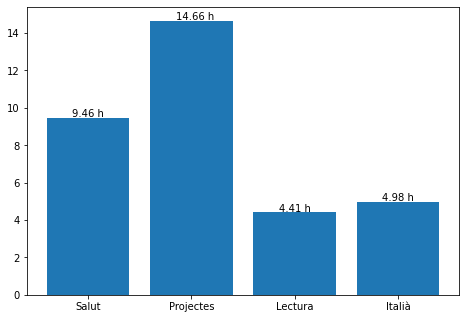

In [10]:
result = total_hours(hab_df, dt.datetime.fromisoformat('2022-01-01'), dt.datetime.fromisoformat('2022-03-20'))
labels, time = list(zip(*result))

hours = [to_hours(t) for t in time]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

for index, value in enumerate(hours):
    plt.text(index-0.15, value+0.06, str(value)+" h")

ax.bar(labels, hours)
plt.show()

In [24]:
#printeja l'última setmana

def last_week(df):
    result = total_hours(df, dt.datetime.today() - dt.timedelta(days=8), dt.datetime.today())
    result.sort(key=lambda x:x[1], reverse=True)
    
    if(result != []):
        labels, time = list(zip(*result))
    else:
        return -1
    
    hours = [to_hours(t) for t in time]
    
    #bar chart
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    for index, value in enumerate(hours):
        plt.text(index-0.15, value+0.06, str(value)+" h")

    ax.bar(labels, hours)
    plt.show()
    
    #pie chart
    plt.pie(hours, labels=labels)
    plt.show()
    
    #algun dia acabaré això t'ho juro
    

In [25]:
last_week(uni_df)

-1

In [ ]:
"""
Coses a guays a fer
- Divide the subdataframes into activities
- Week to week average hours (amb puntets per veure la progressió)
- Week to week efficiency/expected hours, accomplishing objectives.
- Most efficient hour
- Maximum throught period finding (like most amount of projects made)
"""